# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
tips = load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [3]:
# removing outlier after firts analysis cycle. It impact in results
tips.drop(tips[tips['tip_pct'] > 0.5].index, inplace = True)

In [4]:
#1. patsy matrice
y, X = patsy.dmatrices('tip ~ sex + smoker + time + net_bill + 1', tips)
X

DesignMatrix with shape (242, 5)
  Intercept  sex[T.Female]  smoker[T.No]  time[T.Dinner]  net_bill
          1              1             1               1     15.98
          1              0             1               1      8.68
          1              0             1               1     17.51
          1              0             1               1     20.37
          1              1             1               1     20.98
          1              0             1               1     20.58
          1              0             1               1      6.77
          1              0             1               1     23.76
          1              0             1               1     13.08
          1              0             1               1     11.55
          1              0             1               1      8.56
          1              1             1               1     30.26
          1              0             1               1     13.85
          1              0   

In [5]:
modelo = sm.OLS(y,X).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     34.67
Date:                Sat, 08 Oct 2022   Prob (F-statistic):           8.79e-23
Time:                        14:13:57   Log-Likelihood:                -365.24
No. Observations:                 242   AIC:                             740.5
Df Residuals:                     237   BIC:                             757.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.0593      0.238      4.446      0.000       0.590       1.529
sex[T.Female]     -0.0005      0.153     -0.003      0.997      -0.302       0.301
smoker[T.No]       0.2143      0.148      1.450      0.148      -0.077       0.505
time[T.Dinner]     0.0079      0.164      0.048      0.962      -0.315       0.331
net_bill           0.1058      0.009     11.483      0.000       0.088       0.124
==============================================================================
Omnibus:                       31.112   Durbin-Watson:                   2.112
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.889
Skew:                           0.682   Prob(JB):                     2.69e-13
Kurtosis:                       4.969   Cond. No.                         71.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
#2. removing no meaningful variables
y, X = patsy.dmatrices('tip ~ net_bill + 1', tips)
X

DesignMatrix with shape (242, 2)
  Intercept  net_bill
          1     15.98
          1      8.68
          1     17.51
          1     20.37
          1     20.98
          1     20.58
          1      6.77
          1     23.76
          1     13.08
          1     11.55
          1      8.56
          1     30.26
          1     13.85
          1     15.43
          1     11.81
          1     17.66
          1      8.66
          1     12.58
          1     13.47
          1     17.30
          1     13.84
          1     17.54
          1     13.54
          1     31.84
          1     16.64
          1     15.47
          1     11.37
          1     10.69
          1     17.40
          1     16.65
  [212 rows omitted]
  Terms:
    'Intercept' (column 0)
    'net_bill' (column 1)
  (to view full data, use np.asarray(this_obj))

In [7]:
modelo = sm.OLS(y,X).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     137.1
Date:                Sun, 11 Sep 2022   Prob (F-statistic):           2.41e-25
Time:                        19:30:46   Log-Likelihood:                -366.31
No. Observations:                 242   AIC:                             736.6
Df Residuals:                     240   BIC:                             743.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2219      0.166      7.339      0.000       0.894       1.550
net_bill       0.1044      0.009     11.708      0.000       0.087       0.122
==============================================================================
Omnibus:                       27.459   Durbin-Watson:                   2.108
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.674
Skew:                           0.610   Prob(JB):                     9.92e-12
Kurtosis:                       4.881   Cond. No.                         43.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

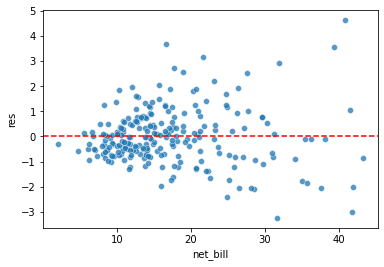

In [7]:
#3. residual chart
tips['res'] = modelo.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     139.4
Date:                Sat, 08 Oct 2022   Prob (F-statistic):           1.13e-25
Time:                        14:15:23   Log-Likelihood:                -365.56
No. Observations:                 242   AIC:                             735.1
Df Residuals:                     240   BIC:                             742.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.9851      0.427  

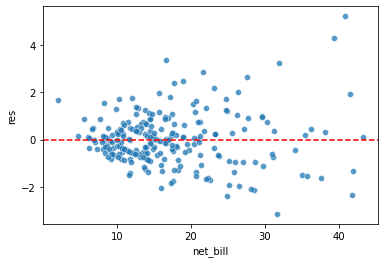

In [9]:
#4. net_bill in log
modelo2 = smf.ols('tip ~ np.log(net_bill)', data = tips).fit()
print(modelo2.summary())

tips['res'] = modelo2.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     111.2
Date:                Sat, 08 Oct 2022   Prob (F-statistic):           1.30e-21
Time:                        14:15:34   Log-Likelihood:                -374.91
No. Observations:                 242   AIC:                             753.8
Df Residuals:                     240   BIC:                             760.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.22

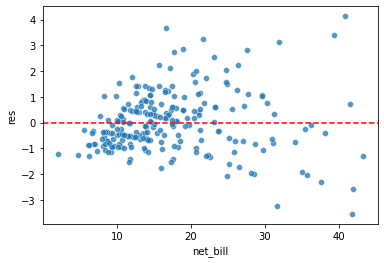

In [10]:
#4. net_bill in polynomial
modelo3 = smf.ols('tip ~ np.power(net_bill, 2)', data = tips).fit()
print(modelo3.summary())

tips['res'] = modelo3.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

<span style="color:blue">O modelo3 (polinônio) apresenta o melhor R² e uma distribuição mais uniforme dos resíduos<p>

### II. Modelo no valor do percentual da gorjeta
<span style="color:red">(esse item ficou confuso, pois o título refere-se a variável percentual da gorjeta (tip_pct) e abaixo está escrito tip)<p>

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de tip, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [11]:
new_y, new_X = patsy.dmatrices('np.log(tip_pct) ~ sex + smoker + time + net_bill + 1', tips)
new_X

DesignMatrix with shape (242, 5)
  Intercept  sex[T.Female]  smoker[T.No]  time[T.Dinner]  net_bill
          1              1             1               1     15.98
          1              0             1               1      8.68
          1              0             1               1     17.51
          1              0             1               1     20.37
          1              1             1               1     20.98
          1              0             1               1     20.58
          1              0             1               1      6.77
          1              0             1               1     23.76
          1              0             1               1     13.08
          1              0             1               1     11.55
          1              0             1               1      8.56
          1              1             1               1     30.26
          1              0             1               1     13.85
          1              0   

In [12]:
modelo4 = sm.OLS(new_y,new_X).fit()
modelo4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     17.48
Date:                Sat, 08 Oct 2022   Prob (F-statistic):           1.38e-12
Time:                        14:19:08   Log-Likelihood:                -80.880
No. Observations:                 242   AIC:                             171.8
Df Residuals:                     237   BIC:                             189.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.3700      0.074    -18.620      0.000      -1.515      -1.225
sex[T.Female]      0.0216      0.047      0.457      0.648      -0.071       0.115
smoker[T.No]       0.0359      0.046      0.787      0.432      -0.054       0.126
time[T.Dinner]    -0.0107      0.051     -0.211      0.833      -0.111       0.089
net_bill          -0.0224      0.003     -7.862      0.000      -0.028      -0.017
==============================================================================
Omnibus:                        7.672   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                8.077
Skew:                          -0.331   Prob(JB):                       0.0176
Kurtosis:                       3.602   Cond. No.                         71.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
#2. removing no meaningful variables
new_y, new_X = patsy.dmatrices('np.log(tip_pct) ~ net_bill + 1', tips)
new_X

DesignMatrix with shape (242, 2)
  Intercept  net_bill
          1     15.98
          1      8.68
          1     17.51
          1     20.37
          1     20.98
          1     20.58
          1      6.77
          1     23.76
          1     13.08
          1     11.55
          1      8.56
          1     30.26
          1     13.85
          1     15.43
          1     11.81
          1     17.66
          1      8.66
          1     12.58
          1     13.47
          1     17.30
          1     13.84
          1     17.54
          1     13.54
          1     31.84
          1     16.64
          1     15.47
          1     11.37
          1     10.69
          1     17.40
          1     16.65
  [212 rows omitted]
  Terms:
    'Intercept' (column 0)
    'net_bill' (column 1)
  (to view full data, use np.asarray(this_obj))

In [14]:
modelo4 = sm.OLS(new_y,new_X).fit()
modelo4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     69.62
Date:                Sat, 08 Oct 2022   Prob (F-statistic):           5.70e-15
Time:                        14:20:02   Log-Likelihood:                -81.349
No. Observations:                 242   AIC:                             166.7
Df Residuals:                     240   BIC:                             173.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3383      0.051    -26.095      0.000      -1.439      -1.237
net_bill      -0.0229      0.003     -8.344      0.000      -0.028      -0.018
==============================================================================
Omnibus:                        8.210   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                8.483
Skew:                          -0.362   Prob(JB):                       0.0144
Kurtosis:                       3.563   Cond. No.                         43.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

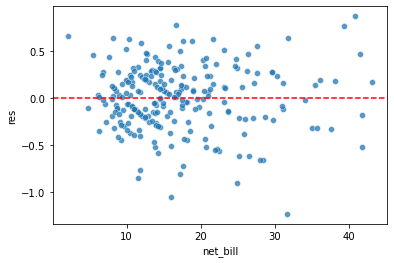

In [15]:
#3. residual chart
tips['res'] = modelo4.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

                            OLS Regression Results                            
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     71.57
Date:                Sat, 08 Oct 2022   Prob (F-statistic):           2.65e-15
Time:                        14:27:38   Log-Likelihood:                -80.588
No. Observations:                 242   AIC:                             165.2
Df Residuals:                     240   BIC:                             172.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.6285      0.131  

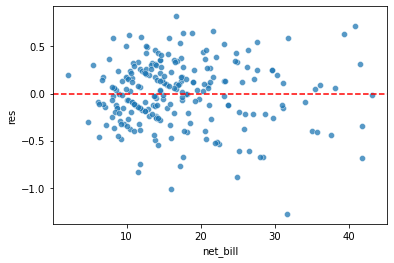

In [25]:
#4. net_bill in log
modelo5 = smf.ols('np.log(tip_pct) ~ np.log(net_bill)', data = tips).fit()
print(modelo5.summary())

tips['res'] = modelo5.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

                            OLS Regression Results                            
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     58.47
Date:                Sat, 08 Oct 2022   Prob (F-statistic):           4.97e-13
Time:                        14:27:29   Log-Likelihood:                -85.787
No. Observations:                 242   AIC:                             175.6
Df Residuals:                     240   BIC:                             182.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -1.55

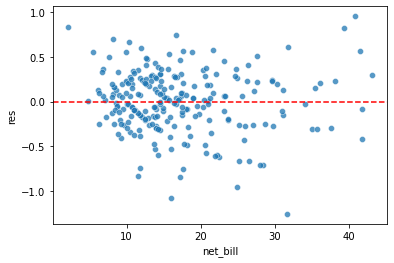

In [24]:
#4. net_bill in polynimial
modelo6 = smf.ols('np.log(tip_pct) ~ np.power(net_bill, 2)', data = tips).fit()
print(modelo6.summary())

tips['res'] = modelo6.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

<span style="color:blue">O modelo5 (log) apresenta o melhor R² e a distribuição dos resíduos para mod5 e mod6 é bem semelhante.<p>

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     43.61
Date:                Sat, 08 Oct 2022   Prob (F-statistic):           2.56e-10
Time:                        14:26:36   Log-Likelihood:                 326.27
No. Observations:                 242   AIC:                            -648.5
Df Residuals:                     240   BIC:                            -641.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.21

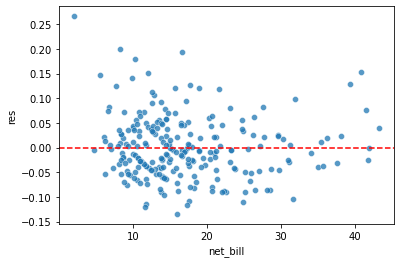

In [23]:
#4. net_bill in polynimial
modelo7 = smf.ols('tip_pct ~ np.power(net_bill, 2)', data = tips).fit()
print(modelo7.summary())

tips['res'] = modelo7.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

<span style="color:blue">O modelo7 da variável tip_pct sem log apresenta o R² menor do que o modelo 5 do tip_pct com o log.<p>

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [26]:
income_raw = pd.read_csv('previsao_de_renda.csv')
income_raw.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


#### Item 1 e 2
<span style="color:blue">Os ajustes feitos por log e polinômio não melhoraram de forma significativa o modelo. A variável 'tempo_emprego' sozinha não é explicativa para o modelo.<p>

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     2294.
Date:                Sat, 08 Oct 2022   Prob (F-statistic):               0.00
Time:                        14:49:51   Log-Likelihood:            -1.2249e+05
No. Observations:               12466   AIC:                         2.450e+05
Df Residuals:                   12464   BIC:                         2.450e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2653.9453     60.924     43.561

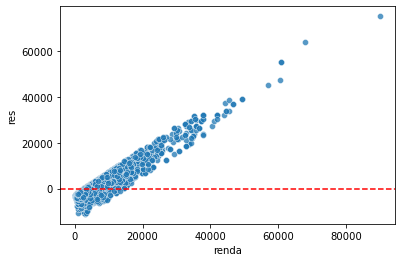

In [37]:
model = smf.ols('renda ~ tempo_emprego', data = income_raw).fit()
print(model.summary())

income_raw['res'] = model.resid

sns.scatterplot(x = 'renda', y = 'res', data = income_raw, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

<span style="color:blue">A distribuição do resíduo apresenta uma concentração e distribuição muito aguda do padrão. Podemos ver também os valores do R² muito baixo, o omnibus e kurtosis muito elevados, indicando que o modelo não é robusto.<p>

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.230
Method:                 Least Squares   F-statistic:                     287.2
Date:                Sat, 08 Oct 2022   Prob (F-statistic):               0.00
Time:                        15:46:31   Log-Likelihood:            -1.2191e+05
No. Observations:               12466   AIC:                         2.438e+05
Df Residuals:                   12452   BIC:                         2.439e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

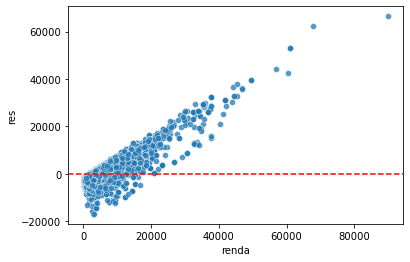

In [71]:
model1 = smf.ols('renda ~ np.power(tempo_emprego, 2) + idade + posse_de_imovel + sexo + educacao + tipo_renda + qtd_filhos', data = income_raw).fit()
print(model1.summary())

income_raw['res'] = model1.resid

sns.scatterplot(x = 'renda', y = 'res', data = income_raw, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     77.11
Date:                Sat, 08 Oct 2022   Prob (F-statistic):               0.00
Time:                        16:00:34   Log-Likelihood:            -1.2177e+05
No. Observations:               12466   AIC:                         2.436e+05
Df Residuals:                   12412   BIC:                         2.440e+05
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
                                                                                                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

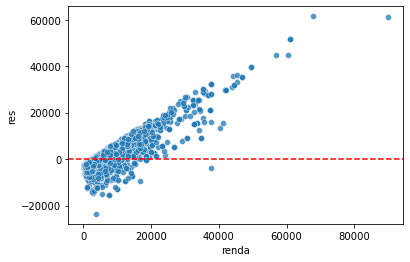

In [98]:
model2 = smf.ols('renda ~ (np.power(tempo_emprego, 2) * np.power(idade, 2)) * (posse_de_imovel * sexo * tipo_renda)', data = income_raw).fit()
print(model2.summary())

income_raw['res'] = model2.resid

sns.scatterplot(x = 'renda', y = 'res', data = income_raw, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

<span style="color:blue">Não consegui encontrar um modelo que normalizase o gráfico do resíduo. Fiquei mais de duas semanas tentando e não consegui. Aguardo as correções.<p>